# Data Cleaning and Preparation for Training Machine Learning Model 

The tools used in this project are :

1. Python Pandas
2. Python Numpy
3. Python Matplotlib
4. Python Seaborn

The major steps involved in Data cleaning and preparation are:

1. Handling missimg values
2. Handling null values
3. Handling duplicate values
4. Adding/Dropping/Renaming Columns
5. Dropping rows based on conditions
6. Changing Column formats
7. Converting Categorical features to numbers, etc.


# Problem Statement

Your team is building a Machine Learning model which will predict whether a passenger survived or not in the Titanic crash. As a Junior Data Scientist you are tasked with cleaning and preparation of the data, for it to be used as a training set for the logistic regression Machine Learning model. The final aim of the model would be to predict a classification: Survived or Deceased.

## 1.Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

## 2. Import Data

In [2]:
train= pd.read_csv("C:/Users/RAHUL SINGH/Downloads/DATA_ANALYST/Python/Titanic Project/Titanic dataset/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check for Missing Data

In [3]:
train.isnull().value_counts().reset_index()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,False,False,False,False,False,False,False,False,False,False,True,False,529
1,False,False,False,False,False,False,False,False,False,False,False,False,183
2,False,False,False,False,False,True,False,False,False,False,True,False,158
3,False,False,False,False,False,True,False,False,False,False,False,False,19
4,False,False,False,False,False,False,False,False,False,False,False,True,2


<AxesSubplot:>

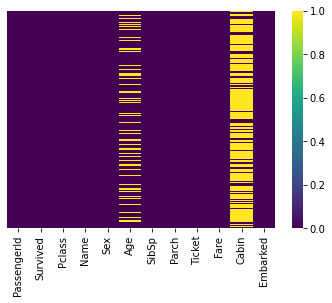

In [4]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= True,  cmap= "viridis" )

INFERENCES:

Roughly 20 percent of the age data is missing.

The proportion of age missing is small enogh for reasonable replacement with some form of imputation.

Looking at the cabin column it looks like we are just missing too much of that data to do something useful with it at a very basic level. we'll probably drop it later or change it to another feature like "Cabin Known :1 or 0"


<AxesSubplot:xlabel='Survived', ylabel='count'>

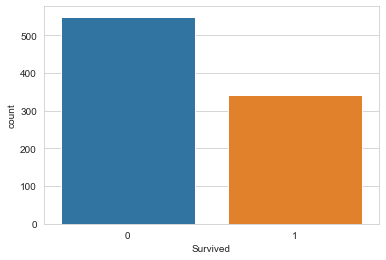

In [5]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

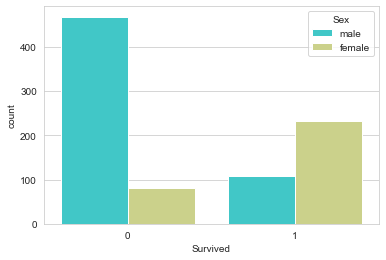

In [6]:
sns.countplot(x="Survived", hue="Sex", data= train, palette="rainbow")

<AxesSubplot:xlabel='Survived', ylabel='count'>

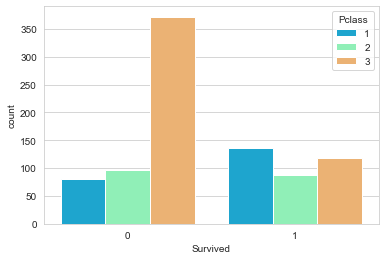

In [7]:
sns.countplot(x="Survived", hue="Pclass", data= train, palette="rainbow")

C:\Users\RAHUL SINGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

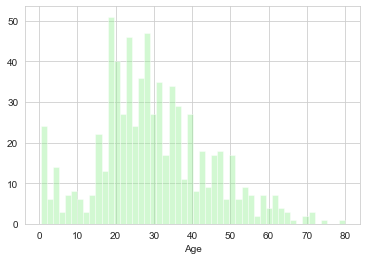

In [8]:
sns.distplot(train["Age"].dropna(), kde= False, color="lightgreen", bins=50 )

<AxesSubplot:>

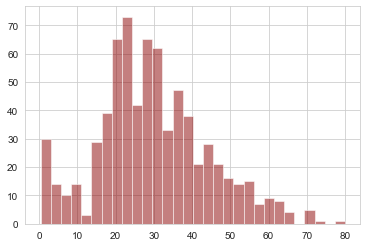

In [9]:
# Alterante method for above operation

train["Age"].hist(bins=30,color="darkred", alpha=0.5)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

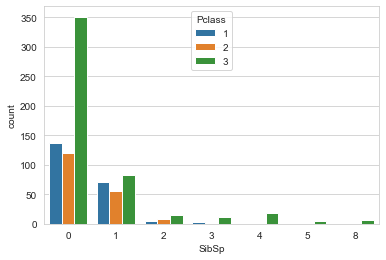

In [10]:
sns.countplot(x="SibSp",hue="Pclass", data=train)

C:\Users\RAHUL SINGH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

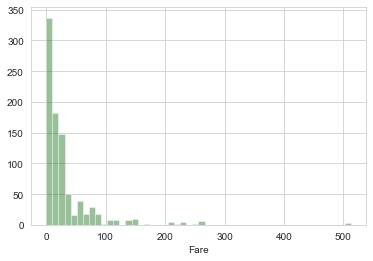

In [11]:
sns.distplot(train["Fare"].dropna(), kde= False, color="darkgreen")

<AxesSubplot:>

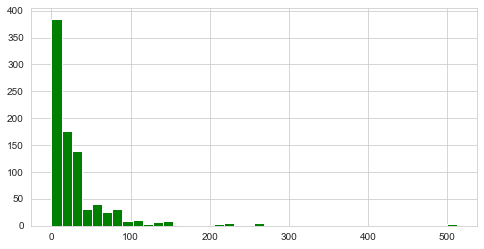

In [12]:
train["Fare"].hist(color="green", bins=40, figsize=(8,4))

## 4. Removing Null Values

We want to fill in missing age data instead of just dropping the missing age data rows.
One way to do this is by filling the mean age of all passengers(imputation).
However we can be smarter about this and check the average age by passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

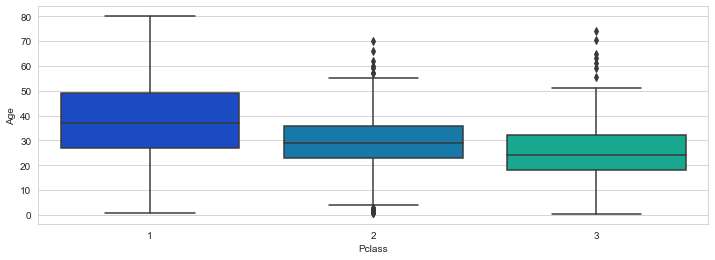

In [13]:
plt.figure(figsize=(12,4))
sns.boxplot(x="Pclass", y="Age", data=train, palette="winter")

Here we will define an impute function to perform imputation of the null values. Our aim here is to replace all the null values with some value depending on the distribution of the other values in that column.

We will start with the Age column.

In [14]:
# Define impute function

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
             return 37
        elif Pclass==2:
             return 29
        else:
            return 24
    else:
        return Age

In [15]:
# Impute data

train["Age"]=train[["Age", "Pclass"]].apply(impute_age, axis=1)

<AxesSubplot:>

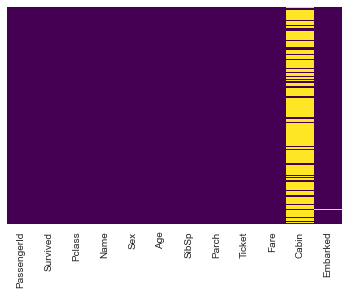

In [16]:
# Check Heatmap again

sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap= "viridis")

From the above heatmap we can clearly see that the null values in the Age column have all been replaced with some value.

Drop the Cabin column and the row in embarked that is NaN


In [17]:
# Drop the Cabin column and the row in embarked that is NaN

train.drop("Cabin", axis=1, inplace= True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

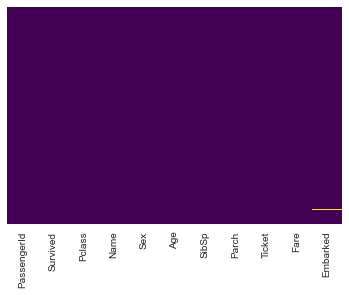

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap= "viridis")

## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas. Otherwise our machine learning algorithm wont be able to take those values as inputs.

In [19]:
sex= pd.get_dummies(train["Sex"], drop_first= True)
embark= pd .get_dummies(train["Embarked"], drop_first= True)

In [20]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace= True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [23]:
pd.concat([train, sex, embark], axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


# Our data is ready for our model